In [2]:
# This cmd is needed in order to load our files from drive
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import pandas_gbq
from google.colab import files
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from termcolor import colored as cl
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set default plots' configuration
plt.rcParams['figure.figsize'] = (20, 10)
sns.set_style('whitegrid')

# Set float format display option
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# Read csv and create pandas dataframe
path = '/content/drive/MyDrive/efood/grouped_data.csv'
df = pd.read_csv(path)

# Set column 'user_id' as index
df.set_index('user_id', inplace = True)

In [5]:
df.head(10)

,amountoforder,frequency
user_id,,
106414882,202.300,33
50885108,164.800,31
42623692,278.800,29
12351828,147.400,28
72180854,122.900,28
88123534,118.400,28
58766564,146.700,28
36239490,140.500,28
16479638,151.200,28


In [6]:
# Check the number of data - 162954 rows are expected
df.count()

amountoforder    162954
frequency        162954
dtype: int64

In [246]:
# Check the columns of the updated dataframe - only columns 'amountoforder', 'frequency' are expected
df.columns

Index(['amountoforder', 'frequency'], dtype='object')

In [7]:
# Data Proccessing - Normalization
dataset_array = df.values
dataset_array = np.nan_to_num(dataset_array)
scaler = StandardScaler()
cluster_data = scaler.fit_transform(dataset_array)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:10])

Cluster data samples :  [[ 8.99248311 13.24443124]
 [ 7.12823909 12.3772325 ]
 [12.79554092 11.51003377]
 [ 6.26322986 11.0764344 ]
 [ 5.0452571  11.0764344 ]
 [ 4.82154782 11.0764344 ]
 [ 6.22843064 11.0764344 ]
 [ 5.92020896 11.0764344 ]
 [ 6.45213992 11.0764344 ]
 [19.5615039  10.64283503]]


In [8]:
# Apply the Elbow method to define the optimal number of clusters
list_of_dist = []
iterrations = range(1,10)
for item in iterrations:
    model = KMeans(n_clusters=item)
    model.fit(df)
    list_of_dist.append(model.inertia_)

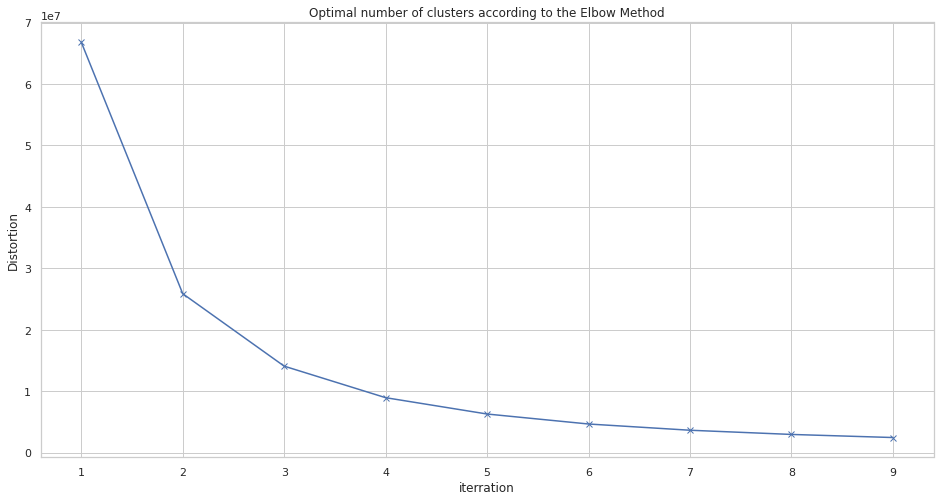

In [9]:
# Plot Elbow method's results
plt.figure(figsize=(16,8))
plt.plot(iterrations, list_of_dist, 'bx-')
plt.xlabel('iterration')
plt.ylabel('Distortion')
plt.title('Optimal number of clusters according to the Elbow Method')
plt.show()

In [10]:
# Create and fit the model
# We will use 4 clusters, according to the Elbow methods results
clusters = 4
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 25)
model.fit(dataset_array)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1]


In [11]:
# Create a new column in the dataframe which includes ne number of the cluster in which the customer of each row belongs
df['cluster_num'] = labels
df.head()

,amountoforder,frequency,cluster_num
user_id,,,
106414882,202.300,33,1
50885108,164.800,31,1
42623692,278.800,29,1
12351828,147.400,28,1
72180854,122.900,28,1


In [12]:
# Create a dataframe which includes the average of 'amountoforder' and 'frequency' for each class - use for insights
mean_per_cluster = df.groupby('cluster_num').mean()
display(mean_per_cluster)

,amountoforder,frequency
cluster_num,,
0,27.168,2.965
1,107.330,9.431
2,54.765,5.541
3,9.749,1.420


No handles with labels found to put in legend.


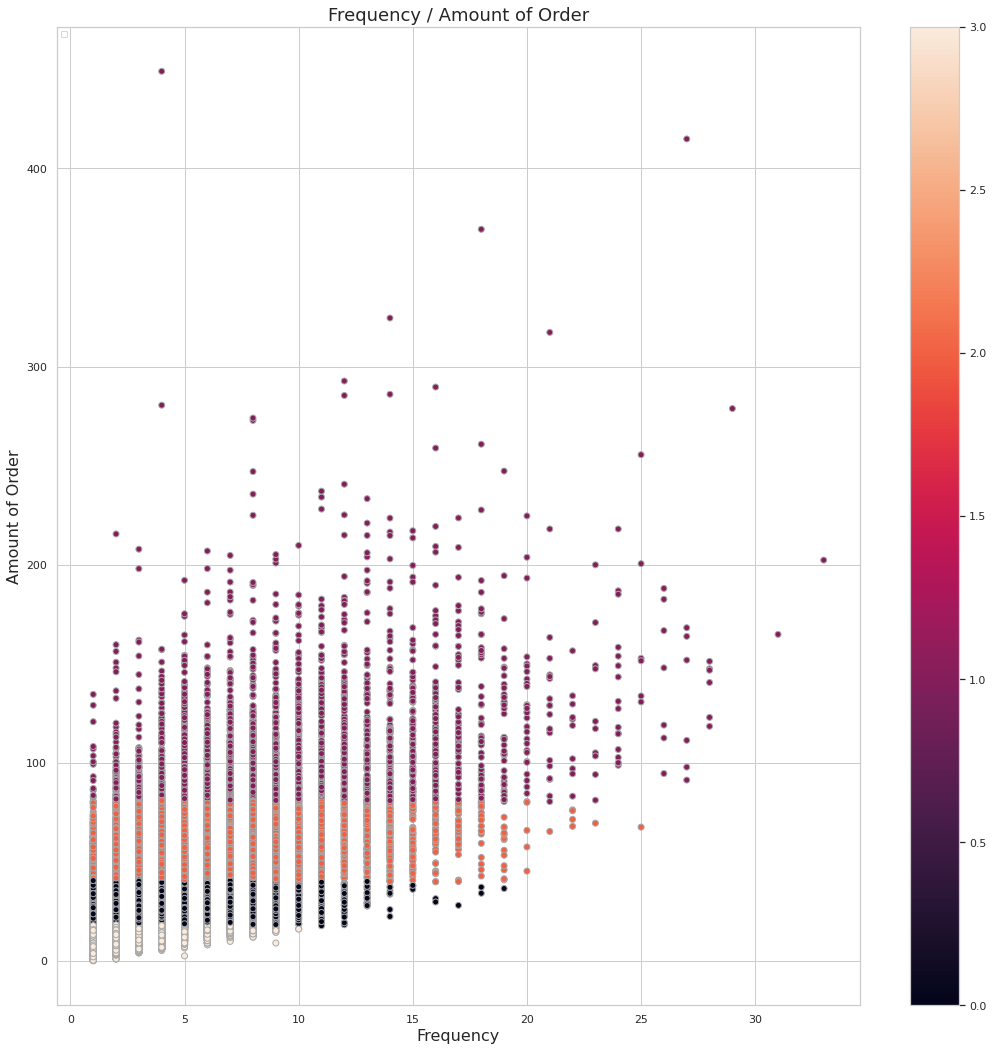

In [13]:
# Plot of the clustering results
f, axes = plt.subplots(figsize=(18, 18), sharex=False, sharey=False)
x = plt.scatter(df['frequency'], df['amountoforder'],  c=df['cluster_num'], cmap='rocket',  alpha=1, marker = 'o', edgecolor = 'darkgrey')
plt.colorbar(x)
plt.title('Frequency / Amount of Order', 
          fontsize = 18)
plt.xlabel('Frequency', 
           fontsize = 16)
plt.ylabel('Amount of Order', 
           fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 8)
# Save plot as image for report purposes
plt.savefig('clusters.png')
plt.show()

In [14]:
# Create aggregation dataframe - for report purpose
aggregations = df.groupby('cluster_num').agg({'frequency':['min', 'max', 'mean', 'sum'], 'amountoforder':['min', 'max', 'mean', 'sum']})
display(aggregations)

frequency            ... amountoforder                    
                  min max  mean  ...           max    mean         sum
cluster_num                      ...                                  
0                   1  19 2.965  ...        41.150  27.168 1283724.730
1                   1  33 9.431  ...       449.050 107.330  350324.190
2                   1  25 5.541  ...        81.400  54.765  923455.480
3                   1  10 1.420  ...        18.550   9.749  931776.460

[4 rows x 8 columns]

In [15]:
# Create statistics dataframe - for report purpose
statistics = df.groupby('cluster_num').describe(percentiles = [0.25, 0.50, 0.75, 0.90, 0.95])
display(statistics)

amountoforder                        ... frequency                     
                    count    mean    std    min  ...       75%    90%    95%    max
cluster_num                                      ...                               
0               47251.000  27.168  6.242 17.700  ...     4.000  5.000  6.000 19.000
1                3264.000 107.330 29.864 80.400  ...    12.000 16.000 18.000 33.000
2               16862.000  54.765 10.574 39.900  ...     7.000 10.000 11.000 25.000
3               95577.000   9.749  4.436  0.000  ...     2.000  2.000  3.000 10.000

[4 rows x 20 columns]

In [16]:
# Create a dataframe for each one of the clusters
df_cluster_0 = df[df['cluster_num'] == 0]
df_cluster_1 = df[df['cluster_num'] == 1]
df_cluster_2 = df[df['cluster_num'] == 2]
df_cluster_3 = df[df['cluster_num'] == 3]

In [17]:
# Check the count of data in cluster 0 - for report purpose
df_cluster_0.count()

amountoforder    47251
frequency        47251
cluster_num      47251
dtype: int64

In [18]:
# Check the count of data in cluster 1 - for report purpose
df_cluster_1.count()

amountoforder    3264
frequency        3264
cluster_num      3264
dtype: int64

In [19]:
# Check the count of data in cluster 2 - for report purpose
df_cluster_2.count()

amountoforder    16862
frequency        16862
cluster_num      16862
dtype: int64

In [20]:
# Check the count of data in cluster 3 - for report purpose
df_cluster_3.count()

amountoforder    95577
frequency        95577
cluster_num      95577
dtype: int64

In [267]:
# Save to csv format - for report purpose
df_cluster_0.to_csv('cluster0.csv') 
df_cluster_1.to_csv('cluster1.csv') 
df_cluster_2.to_csv('cluster2.csv') 
df_cluster_3.to_csv('cluster3.csv') 
mean_per_cluster.to_csv('mean_clusters.csv') 
aggregations.to_csv('aggregations.csv')
statistics.to_csv('stats.csv') 

In [268]:
# Download files locally - for report purpose
files.download('cluster0.csv')
files.download('cluster1.csv')
files.download('cluster2.csv')
files.download('cluster3.csv')
files.download('mean_clusters.csv')
files.download('clusters.png')
files.download('aggregations.csv')
files.download('stats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>